In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
titanic_data = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/tmp/ipykernel_20/1784579098.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), cmap="YlOrRd")


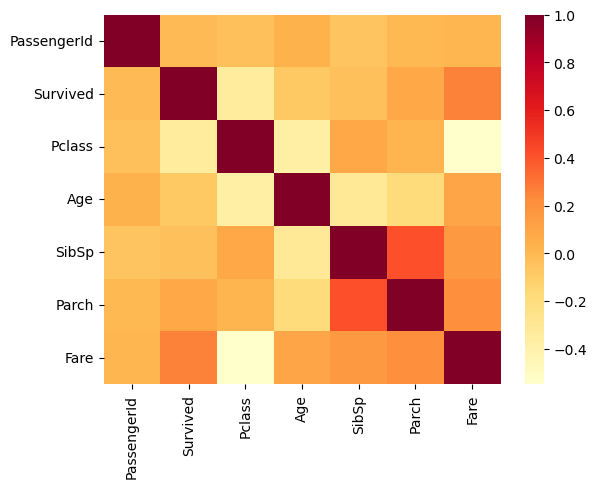

In [5]:
sns.heatmap(titanic_data.corr(), cmap="YlOrRd")
plt.show()

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
port = pd.get_dummies(titanic_data.Embarked, prefix = 'Embarked')
port.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [8]:
titanic_data = titanic_data.join(port)
titanic_data.drop(['Embarked'] , axis = 1 , inplace = True)

In [9]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1,0,0


In [10]:
dummy = pd.get_dummies(titanic_data['Sex'])

In [11]:
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [12]:
titanic_data = pd.concat((titanic_data,dummy) , axis=1)

In [13]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [14]:
titanic_data.drop(['Sex'],axis =1 , inplace = True)

In [15]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [16]:
titanic_data.drop(['male'],axis =1 , inplace = True)

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0


In [18]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
female           0
dtype: int64

In [19]:
titanic_data.drop(['Name'],axis =1 , inplace = True)
titanic_data.drop(['Ticket'],axis =1 , inplace = True)
titanic_data.drop(['Cabin'],axis =1 , inplace = True)

In [20]:
# Data types of all the entries
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
female           uint8
dtype: object

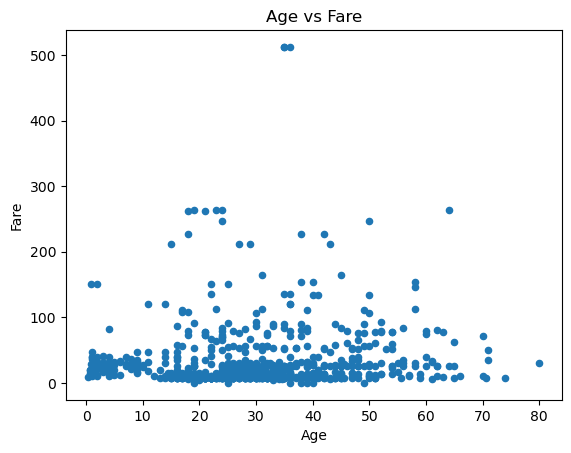

In [21]:
ax = titanic_data.plot(kind = 'scatter' , x = 'Age' , y = 'Fare' , title = 'Age vs Fare')
plt.show()

In [22]:
# Renaming female column back to sex after converting intial data to binary
titanic_data = titanic_data.rename(columns = {"female":"Sex"})

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


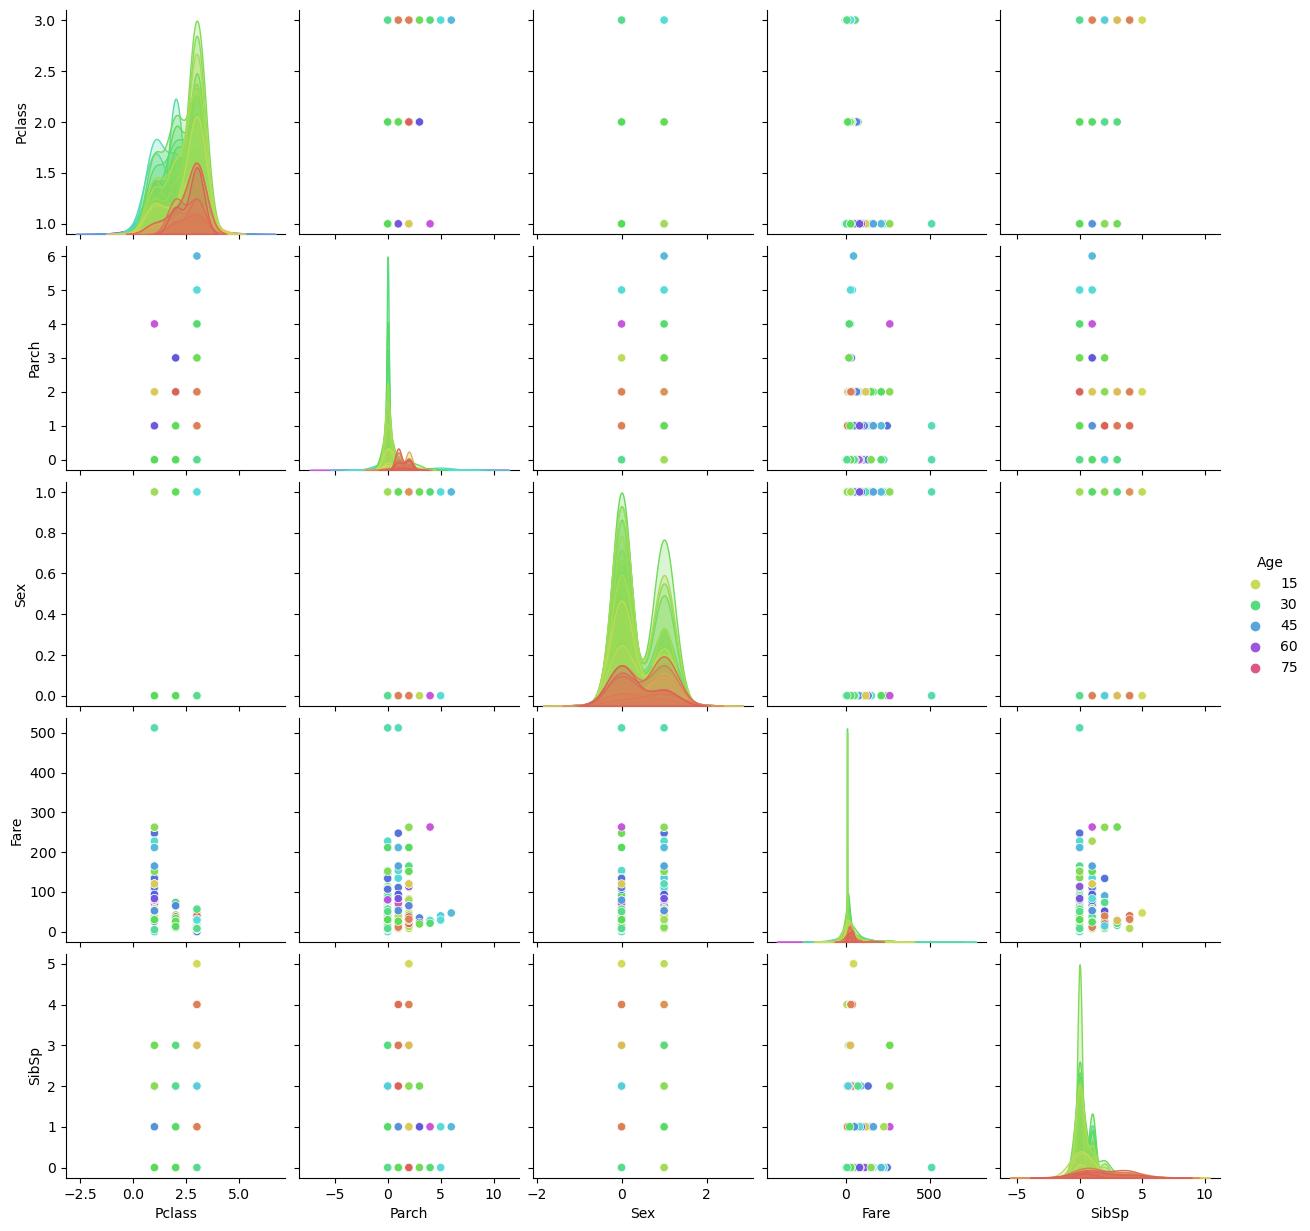

In [23]:
sns.pairplot(titanic_data , vars = ['Pclass' , 'Parch' , 'Sex' , 'Fare' , 'SibSp'] , hue = 'Age' , palette='hls')
plt.show()

In [24]:
# Correlation between all the parameter
titanic_corr = titanic_data[['Pclass','Fare','Sex','Age','Survived']].corr()
titanic_corr

,Pclass,Fare,Sex,Age,Survived
Pclass,1.000000,-0.549500,-0.131900,-0.369226,-0.338481
Fare,-0.549500,1.000000,0.182333,0.096067,0.257307
Sex,-0.131900,0.182333,1.000000,-0.093254,0.543351
Age,-0.369226,0.096067,-0.093254,1.000000,-0.077221
Survived,-0.338481,0.257307,0.543351,-0.077221,1.000000


<Axes: >

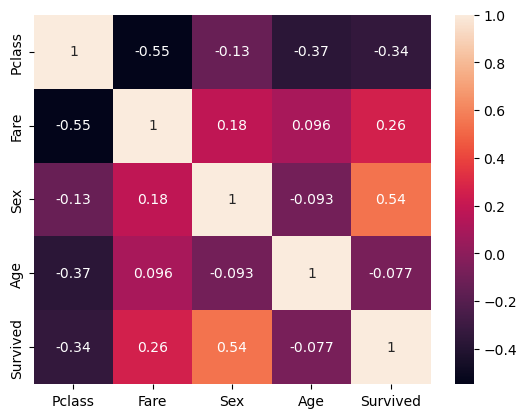

In [25]:
sns.heatmap(titanic_corr , annot=True)

In [26]:
titanic_data.Age.isnull().values.any()

True

In [27]:
titanic_data.Age.fillna(titanic_data.Age.mean(), inplace = True)

In [28]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex            0
dtype: int64

In [29]:
y = titanic_data.Survived.copy()
X = titanic_data.drop(['Survived'], axis = 1)

In [30]:
X.head(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex
0,1,3,22.000000,1,0,7.2500,0,0,1,0
1,2,1,38.000000,1,0,71.2833,1,0,0,1
2,3,3,26.000000,0,0,7.9250,0,0,1,1
3,4,1,35.000000,1,0,53.1000,0,0,1,1
4,5,3,35.000000,0,0,8.0500,0,0,1,0
5,6,3,29.699118,0,0,8.4583,0,1,0,0
6,7,1,54.000000,0,0,51.8625,0,0,1,0
7,8,3,2.000000,3,1,21.0750,0,0,1,0
8,9,3,27.000000,0,2,11.1333,0,0,1,1
9,10,2,14.000000,1,0,30.0708,1,0,0,1


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
# Using Logistical Regression
model.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
model.score(X_train,y_train)

0.8103932584269663

In [35]:
model.score(X_valid,y_valid)

0.7597765363128491